# Load Dependencies

In [1]:
# load dependencies'
import concurrent.futures
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import osmnx as ox
import networkx as nx
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from urllib.parse import urljoin
from shapely.geometry import Point, LineString, Polygon
import pyproj 
import mm_utils
from FIS3 import FIS3
from function_util import *
from SMP2 import SMP2
from datetime import datetime

# Visualizing SMP2 

C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\opt

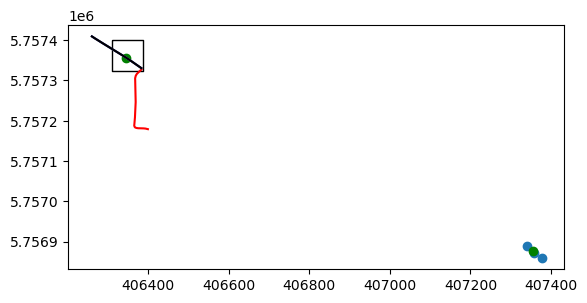

In [2]:
gdf_utm = pd.read_pickle('gdf_utm.pkl')
edges_utm = pd.read_pickle('edges_utm.pkl')
nodes_utm = pd.read_pickle('nodes_utm.pkl')
curr_edge = pd.read_pickle('current_edge.pkl')

err_size = 38
# for debugging purposes start at iteration point 14 
point_index = 39

# this is for debugging purposes, true 
prev_loc = gdf_utm.iloc[[point_index-1]]
last_matched = point_matching(prev_loc, curr_edge.iloc[0])

# current location 
curr_loc = gdf_utm.iloc[[point_index]]

# find longitude and latitude for last matched data
last_matched['lon_lat'] = last_matched.to_crs({'init': 'epsg:4326'})

next_edge = SMP2(curr_loc, curr_edge, prev_loc, last_matched, err_size, nodes_utm, edges_utm, gdf_utm,  Plot = True)
#next_point_matching = point_matching(curr_loc, next_edge.iloc[0])


# Debugging 

In [32]:
gdf_utm = pd.read_pickle('gdf_utm.pkl')
edges_utm = pd.read_pickle('edges_utm.pkl')
nodes_utm = pd.read_pickle('nodes_utm.pkl')
curr_edge_list = pd.read_pickle('edge_debug.pkl')

curr_edge = curr_edge_list.iloc[[26]]
err_size = 38
# for debugging purposes start at iteration point 14 
point_index = 39

# this is for debugging purposes, true 
prev_loc = gdf_utm.iloc[[point_index-1]]
last_matched = point_matching(prev_loc, curr_edge.iloc[0])

# current location 
curr_loc = gdf_utm.iloc[[point_index]]

# find longitude and latitude for last matched data
last_matched['lon_lat'] = last_matched.to_crs({'init': 'epsg:4326'})


C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [31]:
curr_edge

,,,osmid,lanes,ref,name,highway,maxspeed,oneway,reversed,length,geometry,...,width,lon_lat,str_id,perp_dist,lon_lat_pair,edge_heading,heading_error,prev_end_node,connectivity,d_n
u,v,key,,,,,,,,,,,,,,,,,,,,,
51516875,296965817,0,"[727368840, 147518679]",2,K 9,Wolbecker Straße,secondary,50,False,False,27.46,"LINESTRING (406436.006 5757294.613, 406428.306...",...,NaN,"LINESTRING (7.63833 51.95847, 7.63821 51.95852...","727368840,147518679",30.671956,"[(7.6383266, 51.958468), (7.6382131, 51.958515...",303.710488,0.0895,51516875.0,1.0,40.051479


In [28]:
curr_edge_list

osmid   lanes    ref  \
u          v          key                                          
135535395  53200191   0    [673214248, 234046511]       3  L 793   
                      0    [673214248, 234046511]       3  L 793   
53200191   6152925224 0                 470244584       3  L 793   
6152925224 53200192   0    [673214250, 467653690]       2  L 793   
53200192   256534920  0                 148065615       2  L 793   
256534920  53200193   0                 148065615       2  L 793   
                      0                 148065615       2  L 793   
53200193   6152925223 0                 148065615       2  L 793   
6152925223 43599624   0    [234046510, 148065615]  [2, 3]  L 793   
                      0    [234046510, 148065615]  [2, 3]  L 793   
                      0    [234046510, 148065615]  [2, 3]  L 793   
43599624   6152925223 0    [234046510, 148065615]  [2, 3]  L 793   
                      0    [234046510, 148065615]  [2, 3]  L 793   
           110368894  0    [929169177, 665654366]  [2, 3]    K 9   
                      0    [929169177, 665654366]  [2, 3]    K 9   
110368894  52139627   0    [929169177, 160290311]       2    K 9   
52139627   83679375   0                 160290311       2    K 9   
                      0                 160290311       2    K 9   
83679375   43600642   0                 160290311       2    K 9   
43600642   91718741   0                 160290311       2    K 9   
91718741   81331484   0                 160290311       2    K 9   
81331484   51516875   0                 320646340       2    K 9   
                      0                 320646340       2    K 9   
51516875   81331484   0                 320646340       2    K 9   
                      0                 320646340       2    K 9   
                      0                 320646340       2    K 9   
           296965817  0    [727368840, 147518679]       2    K 9   

                                       name    highway maxspeed  oneway  \
u          v          key                                                 
135535395  53200191   0    Wolbecker Straße  secondary       50   False   
                      0    Wolbecker Straße  secondary       50   False   
53200191   6152925224 0    Wolbecker Straße  secondary       50   False   
6152925224 53200192   0    Wolbecker Straße  secondary       50   False   
53200192   256534920  0    Wolbecker Straße  secondary       50   False   
256534920  53200193   0    Wolbecker Straße  secondary       50   False   
                      0    Wolbecker Straße  secondary       50   False   
53200193   6152925223 0    Wolbecker Straße  secondary       50   False   
6152925223 43599624   0    Wolbecker Straße  secondary       50   False   
                      0    Wolbecker Straße  secondary       50   False   
                      0    Wolbecker Straße  secondary       50   False   
43599624   6152925223 0    Wolbecker Straße  secondary       50   False   
                      0    Wolbecker Straße  secondary       50   False   
           110368894  0    Wolbecker Straße  secondary       30   False   
                      0    Wolbecker Straße  secondary       30   False   
110368894  52139627   0    Wolbecker Straße  secondary       30   False   
52139627   83679375   0    Wolbecker Straße  secondary       30   False   
                      0    Wolbecker Straße  secondary       30   False   
83679375   43600642   0    Wolbecker Straße  secondary       30   False   
43600642   91718741   0    Wolbecker Straße  secondary       30   False   
91718741   81331484   0    Wolbecker Straße  secondary       30   False   
81331484   51516875   0    Wolbecker Straße  secondary       30   False   
                      0    Wolbecker Straße  secondary       30   False   
51516875   81331484   0    Wolbecker Straße  secondary       30   False   
                      0    Wolbecker Straße  secondary       30   False   
                      0    Wolbecker Straße  s

## Debugging SMP2 

In [33]:
# get start and end node 
start_node, end_node = node_direction(curr_edge, nodes_utm, curr_loc)

# get edges inside the error region 
err_poly = err_polygon(curr_loc, err_size)

intersects = gpd.sjoin(err_poly, edges_utm, op='intersects')
contains = gpd.sjoin(err_poly, edges_utm, op='contains')

if (len(intersects) + len(contains)) >0:
    # extract index from edges that intersect with error polygon 
    int_index = intersects[['index_right0', 'index_right1', 'index_right2']]
    # extract index from edges that contained in the error polygon 
    cont_index = contains[['index_right0', 'index_right1', 'index_right2']]

    # merge index
    index = pd.concat([int_index, cont_index])
    # drop duplicate
    index = index.drop_duplicates()

    # initialize candidate edges 
    appended_edge = []

    # extract candidate eges  
    for i in range(len(index)):
        edge_list = (index['index_right0'].iloc[i], index['index_right1'].iloc[i], 0 )
        appended_edge.append(edge_list)

    candidate_link = edges_utm.loc[appended_edge]
    # store previous end link info for connectivity checking 
    candidate_link['prev_end_node'] = np.repeat(end_node.name, len(candidate_link))
    # put u and v into column for connectivity checking
    candidate_link_uv = candidate_link.reset_index()

    # calculate perpendicular distance 
    # initialize list that hold perpendicular distance between points and edges
    p_dist = []
    # initialize list that hold connectivity 
    conn = []
    # grab unique edges only 
    #unique_candidate_edge = candidate_link.loc[candidate_link['osmid'].drop_duplicates().index]

    # Extract candidate node from the candidate link 
    # merge index
    node = pd.concat([candidate_link_uv['u'], candidate_link_uv['v']])
    # drop duplicate
    node_list = node.drop_duplicates()
    candidate_node = nodes_utm.loc[node_list]
    print(candidate_node)
    # # Build Network Graph from the candidate node and candidate edge  
    G = ox.graph_from_gdfs(candidate_node, candidate_link)

    origin_edge = curr_edge.iloc[0]

    # project all the candidate link 
    route_list = []
    for i in range(len(candidate_link)):
        target_edge  = candidate_link.iloc[i]
        point_proj = point_matching(curr_loc, target_edge)
        origin_point = (prev_loc['geometry'].iloc[0].x, prev_loc['geometry'].iloc[0].y)
        target_point = (point_proj['geometry'].iloc[0].x, point_proj['geometry'].iloc[0].y)
        route = shotest_path(target_edge, target_point, origin_edge, origin_point, G, nodes_utm)
        route_list.append(route)
        # calculate perpendicular distance between current point and connectivity
        p_dist.append(candidate_link['geometry'].iloc[i].distance(curr_loc['geometry']).iloc[0])
        conn.append(check_connect(candidate_link_uv.iloc[i]))

    route_gdf = pd.concat(route_list)

    # attach perpendicular distance to candidate link 
    candidate_link["perp_dist"] = p_dist

    # attach connectivity 
    candidate_link["connectivity"] = conn
    candidate_link['d_n'] = route_gdf['dist_path'].to_list()
    # print(candidate_link)

    # calculate heading error
    # convert lat lon into tupple coordinate 
    candidate_link['lon_lat_pair'] = candidate_link.lon_lat.apply(lambda geom: list(geom.coords))

    # calculate bearing frome start and end node for each candidate link (see notes below)
    bearing_raw = candidate_link['lon_lat_pair'].apply(edge_bearing)

    # convert bearing from -pi, pi to 0, 2pi range
    candidate_link['edge_heading'] = bearing_raw.apply(conv_angle)

    # heading error = abs(gps heading - edge bearing)
    candidate_link['heading_error'] = abs(candidate_link['edge_heading'] - curr_loc['GPS Bearing'].iloc[0])


    # initialize input for FIS
    PD = candidate_link['perp_dist']
    HE = candidate_link['heading_error']
    speed = np.repeat(curr_loc['speed_mps'], len(candidate_link))
    hdop = np.repeat(curr_loc['GPS HDOP'], len(candidate_link))

    # distance travelled since last position fix 
    t = gdf_utm['time'].iloc[point_index] - gdf_utm['time'].iloc[point_index - 1]
    d = np.repeat((gdf_utm['speed_mps'].iloc[point_index])* t.seconds, len(candidate_link))

    # distance error d - dn 
    dist_err = abs(d - candidate_link['d_n'])
    # convert into list
    dist_err = dist_err.to_list()

    # rearrange new data to the input of fis3  
    new_data = np.array([speed, HE, PD, hdop, conn, dist_err]).T

    # perform FIS3 
    pred =[]
    for i in range(len(new_data)):
        pred.append(FIS3(new_data[i,:], plot = False))

    # pick candidate link based on highest FIS value
    index = pred.index(max(pred))

    # selected edge and its point matched 
    next_edge = candidate_link.iloc[[index]]

    next_point_matching = point_matching(curr_loc, next_edge.iloc[0])

    # plot SMP 
    if Plot == True:
        %matplotlib tk
        # This is how we  visualize edges and error bound 

        # find the last two position for IMP
        poly_1 = err_polygon(curr_loc, err_size)

        # plotting edges and starting point together 
        f, ax = plt.subplots()

        # location for all point
        #locs_utm.plot(ax=ax)
        point_locs = gdf_utm['geometry'].to_frame()
        point_locs.iloc[12:15].plot(ax = ax)

        #err coord 
        # better if we just take location at the last and use error bound function 
        poly_1.plot(ax=ax, facecolor="none")

        # this plot all the road system 
        #edges_utm.plot(ax=ax)
        candidate_link.iloc[[0]].plot(ax = ax, color = 'Red')
        candidate_link.iloc[[3]].plot(ax = ax, color = 'Yellow')
        candidate_link.iloc[4:6].plot(ax = ax, color = 'Blue')
        candidate_link.iloc[6:8].plot(ax = ax)
        # this plot the selected edge at time point 

        # matched point plot
        last_matched.plot(ax = ax, color = "Green")
        next_point_matching.plot(ax = ax, color = "Green")

        # matched_edge 
        next_edge.plot(ax = ax, color = "Black")

        # # plot closest node
        # closest_node.plot(ax = ax, color = "Black")
        # closest_edge.plot(ax = ax , color = "Black")
        # # debuging for djiksta shortest path
        # origin_node.plot(ax = ax, color = "Black")
        # target_node.plot(ax = ax , color = "Black")

                       y              x          highway  street_count  \
osmid                                                                    
52726584    5.757178e+06  406401.661285  traffic_signals             4   
87179651    5.757327e+06  406388.679225              NaN             3   
496537326   5.757329e+06  406385.038087              NaN             3   
1631144431  5.757411e+06  406257.955594              NaN             3   

                 lon        lat                        geometry  \
osmid                                                             
52726584    7.637859  51.957417  POINT (406401.661 5757178.340)   
87179651    7.637629  51.958748  POINT (406388.679 5757326.706)   
496537326   7.637576  51.958768  POINT (406385.038 5757328.999)   
1631144431  7.635705  51.959481  POINT (406257.956 5757410.616)   

                             lon_lat  
osmid                                 
52726584    POINT (7.63786 51.95742)  
87179651    POINT (7.63763 51.95875

C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


UnboundLocalError: cannot access local variable 'dist_path' where it is not associated with a value

In [34]:
origin_edge

osmid                                       [727368840, 147518679]
lanes                                                            2
ref                                                            K 9
name                                              Wolbecker Straße
highway                                                  secondary
maxspeed                                                        50
oneway                                                       False
reversed                                                     False
length                                                       27.46
geometry         LINESTRING (406436.0059923392 5757294.61333120...
access                                                         NaN
width                                                          NaN
lon_lat          LINESTRING (7.6383266 51.958468, 7.6382131 51....
str_id                                         727368840,147518679
perp_dist                                                30.67

In [35]:
o_closest

y                                            5757326.706156
x                                             406388.679225
highway                                                 NaN
street_count                                              3
lon                                                7.637629
lat                                               51.958748
geometry        POINT (406388.6792249618 5757326.706155805)
lon_lat                        POINT (7.6376293 51.9587485)
Name: 87179651, dtype: object

In [36]:
# project all the candidate link 
point_proj = []
for i in range(len(candidate_link)):
    point_proj.append(point_matching(curr_loc, candidate_link.iloc[i]))
point_proj_df = pd.concat(point_proj)

In [37]:
point_proj_df

,geometry
0,POINT (406382.691 5757326.764)
0,POINT (406385.038 5757328.999)
0,POINT (406385.038 5757328.999)
0,POINT (406344.821 5757356.510)
0,POINT (406344.821 5757356.510)


## Debuggin Shortest Path from node 

In [55]:


target_edge  = candidate_link.iloc[i]
point_proj = point_matching(curr_loc, target_edge)

origin_point = (prev_loc['geometry'].iloc[0].x, prev_loc['geometry'].iloc[0].y)
target_point = (point_proj['geometry'].iloc[0].x, point_proj['geometry'].iloc[0].y)
origin_node, origin_dist =  ox.distance.nearest_nodes(G, origin_point[0], origin_point[1], return_dist =True)
target_node, target_dist =  ox.distance.nearest_nodes(G, target_point[0], target_point[1], return_dist = True)

# Retrieve the rows from the nodes GeoDataFrame
o_closest = candidate_node.loc[origin_node]
t_closest = candidate_node.loc[target_node]

#print(origin_edge['str_id'] == target_edge['str_id'])

if (o_closest.name == t_closest.name):
    # start and end points shared same closest node
    route_geom = gpd.GeoDataFrame([[o_closest.geometry]],geometry='geometry', crs=nodes_utm.crs,columns=['geometry'])
    route_geom['length_m'] = 0 
    if origin_edge['str_id'] == target_edge['str_id']:
        # case 1 origin and target share same edge, then distance travelled is equal to difference between target and origin distance to node
        dist_path = abs(target_dist - origin_dist)
        #print(dist_path)
    else:
        # case 2 origin and target are adjacent edge, distance travelled is equal to sum of target and origin distance
        dist_path = target_dist + origin_dist
else : 
    # when start and end points doesnt share same closest node, need to find shortest path 
    # Create a GeoDataFrame from the origin and target points
    od_nodes = gpd.GeoDataFrame([o_closest, t_closest],geometry='geometry', crs=nodes_utm.crs,)


    # Calculate the shortest path
    route = nx.shortest_path(G, source=origin_node, target=target_node, weight='length')


    # Get the nodes along the shortest path
    route_nodes = nodes_utm.loc[route]
    # convert route into linestring so we can calculate distance 
    route_line = LineString(list(route_nodes.geometry.values))

    # Create a GeoDataFrame
    route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_utm.crs, columns=['geometry'])

    # Calculate the route length
    route_geom['length_m'] = route_geom.length
    
    dist_path = route_geom['length_m']
    # fixing distance from origin to nearest nodes
    if origin_edge.name[0] == route[0]:
        if(origin_edge.name[1] == route[1]):
            # origin edge is inside the route, start edge is equal to start of route
            origin_start_node = origin_edge.name[0]
            origin_end_node = origin_edge.name[1]
            dist_path = dist_path - origin_dist
            print('a', dist_path)
        else:
            # origin edge is outside the route, end edge is equal to start of route
            origin_end_node = origin_edge.name[0]
            origin_start_node = origin_edge.name[1]
            dist_path = dist_path + origin_dist
            print('b',dist_path)
    elif origin_edge.name[1] == route[0]:
        if(origin_edge.name[0] == route[1]):
            # origin edge is inside the route, start edge is equal to start of route
            origin_start_node = origin_edge.name[1]
            origin_end_node = origin_edge.name[0]
            dist_path = dist_path - origin_dist
            print('c', dist_path)
        else:
            # origin edge is outside the route, end edge is equal to start of route
            origin_end_node = origin_edge.name[1]
            origin_start_node = origin_edge.name[0]
            dist_path = dist_path + origin_dist
            print('d', dist_path)

    # fixing distance from targert to nearest nodes 
    if target_edge.name[0] == route[-1]:
        if(target_edge.name[1] == route[-2]):
            # target edge is inside the route, end edge is equal to end of route
            target_start_node = target_edge.name[1]
            target_end_node = target_edge.name[0]
            dist_path = dist_path - target_dist
            print('e', dist_path)
        else:
            #target edge is outside the route, end route is start of edge
            target_end_node = target_edge.name[1]
            target_start_node = target_edge.name[0]
            dist_path = dist_path + target_dist
            print('f', dist_path)
    elif target_edge.name[1] == route[-1]:
        if(target_edge.name[0] == route[-2]):
            # target edge is inside the route, end edge is equal to end of route
            target_start_node = target_edge.name[0]
            target_end_node = target_edge.name[1]
            dist_path = dist_path - target_dist
            print('g', dist_path)
        else:
            #target edge is outside the route, end route is start of edge
            target_end_node = target_edge.name[0]
            target_start_node = target_edge.name[1]
            dist_path = dist_path + target_dist
            print('h', dist_path)


route_geom['dist_path'] = dist_path
# route_geom['target_start_node'] = target_start_node
# route_geom['target_end_node'] = target_end_node
# route_geom['origin_start_node'] = origin_start_node
# route_geom['origin_end_node'] = origin_end_node
# route_geom['route_nodes'] = [tuple(route)]

route_geom

h 0    53.029706
Name: length_m, dtype: float64


,geometry,length_m,dist_path
0,"LINESTRING (406388.679 5757326.706, 406385.038...",4.303136,53.029706


In [52]:
origin_dist

8.224380345139776

In [46]:
o_closest.to_frame().T

,y,x,highway,street_count,lon,lat,geometry,lon_lat
87179651,5757326.706156,406388.679225,NaN,3,7.637629,51.958748,POINT (406388.6792249618 5757326.706155805),POINT (7.6376293 51.9587485)


In [48]:
od_nodes

,y,x,highway,street_count,lon,lat,geometry,lon_lat
87179651,5.757327e+06,406388.679225,NaN,3,7.637629,51.958748,POINT (406388.679 5757326.706),POINT (7.6376293 51.9587485)
496537326,5.757329e+06,406385.038087,NaN,3,7.637576,51.958768,POINT (406385.038 5757328.999),POINT (7.6375757 51.9587685)


In [286]:
# graph network 
fig, ax = ox.plot_graph(G)
# using ox to find closest node and edge
closest_node = candidate_node.loc[[ox.distance.nearest_nodes(G, origin_point[0], origin_point[1])]]
closest_edge = candidate_link.loc[[ox.distance.nearest_edges(G, curr_loc['geometry'].iloc[0].x, curr_loc['geometry'].iloc[0].y, return_dist=False)]]

NameError: name 'orig' is not defined

# Visualizing SMP2 

In [51]:
%matplotlib tk
# This is how we  visualize edges and error bound 

# find the last two position for IMP
poly_1 = err_polygon(curr_loc, err_size)

# plotting edges and starting point together 
f, ax = plt.subplots()

# location for all point
#locs_utm.plot(ax=ax)
point_locs = gdf_utm['geometry'].to_frame()
point_locs.iloc[36:45].plot(ax = ax)

#err coord 
# better if we just take location at the last and use error bound function 
poly_1.plot(ax=ax, facecolor="none")

# this plot all the road system 
#edges_utm.plot(ax=ax)
candidate_link.plot(ax = ax, color = 'Red')
# candidate_link.iloc[[3]].plot(ax = ax, color = 'Yellow')
# candidate_link.iloc[4:6].plot(ax = ax, color = 'Blue')
# candidate_link.iloc[6:8].plot(ax = ax)
# this plot the selected edge at time point 


# matched point plot
last_matched.plot(ax = ax, color = "Green")
#next_point_matching.plot(ax = ax, color = "Green")

curr_loc.plot(ax = ax, color = "Black")
prev_loc.plot(ax =ax, color = "Yellow")

# closest node 
od_nodes.plot(ax = ax)

curr_edge.plot(ax =ax, color = "Grey")
# matched_edge 
#next_edge.plot(ax = ax, color = "Black")


# # plot closest node
# closest_node.plot(ax = ax, color = "Black")
# closest_edge.plot(ax = ax , color = "Black")
# # debuging for djiksta shortest path
# origin_node.plot(ax = ax, color = "Black")
# target_node.plot(ax = ax , color = "Black")

<Axes: >